In [1]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [7]:
xs = np.linspace(0, 1, 100)

Piecewise linear functions (trimf and trapmf) - great for representing sets like "almost equal", "in an interval". 

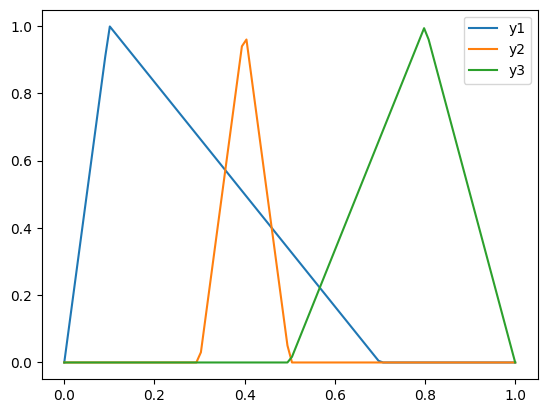

In [9]:
y_1 = fuzz.trimf(xs, [0, 0.1, 0.7])
y_2 = fuzz.trimf(xs, [0.3, 0.4, 0.5])
y_3 = fuzz.trimf(xs, [0.5, 0.8, 1])

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")
plt.plot(xs, y_3, label="y3")

plt.legend()
plt.show()

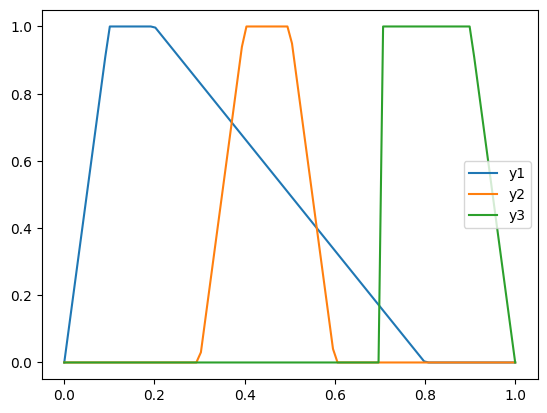

In [11]:
y_1 = fuzz.trapmf(xs, [0, 0.1, 0.2, 0.8])
y_2 = fuzz.trapmf(xs, [0.3, 0.4, 0.5, 0.6])
y_3 = fuzz.trapmf(xs, [0.7, 0.7, 0.9, 1 ])

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")
plt.plot(xs, y_3, label="y3")

plt.legend()
plt.show()

Gaussian functions represent symmetric fuzzy sets which are defined by normal distribution properties - dependent on many indpendent variables.

In [ ]:
def gauss2mf_non_restricted(x, mean1, sigma1, mean2, sigma2):
    y = np.ones(len(x))
    idx1 = x <= mean1
    idx2 = x > mean2
    y[idx1] = fuzz.gaussmf(x[idx1], mean1, sigma1)
    y[idx2] = fuzz.gaussmf(x[idx2], mean2, sigma2)
    return y

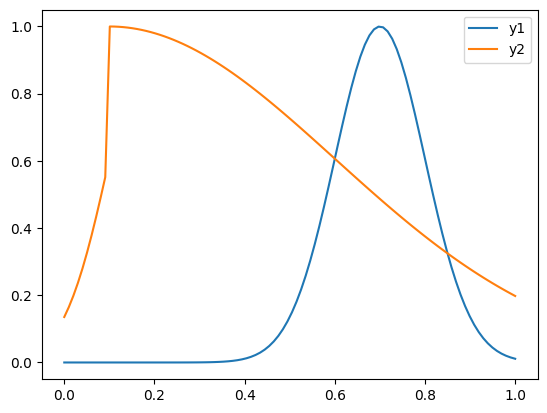

In [21]:
y_1 = fuzz.gaussmf(xs, 0.7, 0.1)
y_2 = gauss2mf_non_restricted(xs, 0.2, 0.1, 0.1, 0.5)

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")

plt.legend()
plt.show()

Bell membership function allows for smooth transition between crisp and fuzzy definitions.

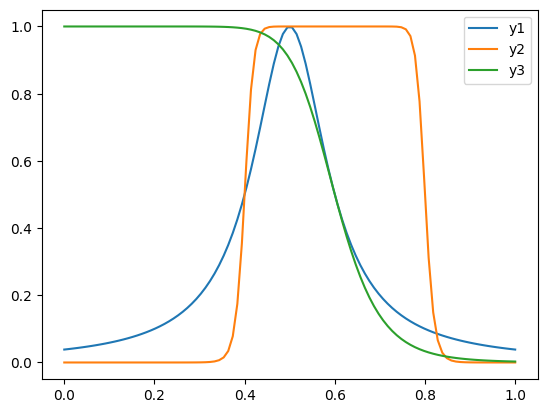

In [23]:
y_1 = fuzz.gbellmf(xs, 0.1, 1, 0.5)
y_2 = fuzz.gbellmf(xs, 0.2, 10, 0.6)
y_3 = fuzz.gbellmf(xs, 0.5, 5, 0.1)

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")
plt.plot(xs, y_3, label="y3")

plt.legend()
plt.show()

Sigmoid-based functions allow for asymetric fuzzy sets.

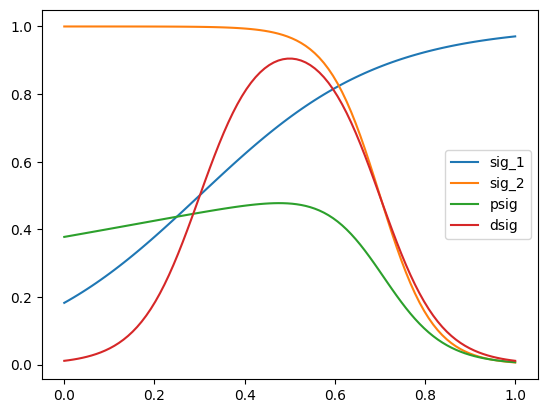

In [33]:
sig_1 = fuzz.sigmf(xs, 0.3, 5)
sig_2 = fuzz.sigmf(xs, 0.7, -17)
psig = fuzz.psigmf(xs, 0.5, 1, 0.7, -15)
dsig = fuzz.dsigmf(xs, 0.7, -15, 0.3, -15)

plt.plot(xs, sig_1, label="sig_1")
plt.plot(xs, sig_2, label="sig_2")
plt.plot(xs, psig, label="psig")
plt.plot(xs, dsig, label="dsig")

plt.legend()
plt.show()

Spline-based functions are used to represent sets where there is an evident monotonicity. 

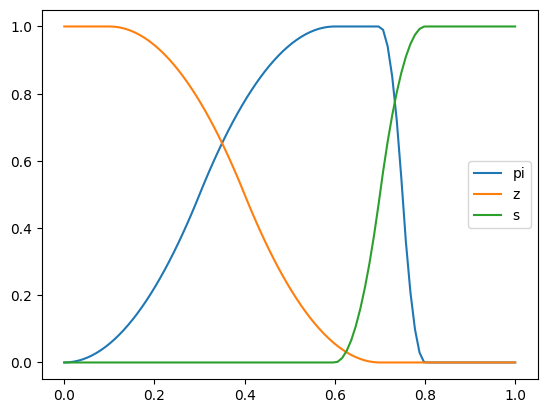

In [35]:
pi = fuzz.pimf(xs, 0, 0.6, 0.7, 0.8)
z = fuzz.zmf(xs, 0.1, 0.7)
s = fuzz.smf(xs, 0.6, 0.8)

plt.plot(xs, pi, label="pi")
plt.plot(xs, z, label="z")
plt.plot(xs, s, label="s")

plt.legend()
plt.show()